# **[SOLUTIONS] Lab #3: Quantum Key Distribution** <br>
## **Microsoft Winter School, February 11th 2023**

### **Summary**

In today's lab, we are going to implement the Quantum Key Distribution protocol BB84 in Q#.

<br>

### **Learning Objectives**
* See how to run the same code with the local simulator, execute on a simulator, and excecute on real quantum hardware.
* See how BB84 can be implemented in code.
* Become familiar with the roles that Alice, Bob, and Eve all play in this protocol.

## **Part #0: Imports**
---

**Run the code below to open the necessary namespaces.**

In [ ]:
from matplotlib import pyplot
import numpy as np
from random import choices
import json

import qsharp.azure
import qsharp


# Connect to available targets
targets = qsharp.azure.connect(
    resourceId="FILL IN WITH YOUR OWN RESOURCE ID",
    location="FILL IN WITH YOUR OWN LOCATION")


# Set the target to ionq.simulator
qsharp.azure.target("ionq.simulator")


# Helper function to pick one result according to the distribution of all results
def pickResult(results):

    probs = list(results.values())
    bits = choices(list(results.keys()), weights = probs)[0]

    return json.loads(bits)

Preparing Q# environment...
....

In [ ]:
%%qsharp

open Microsoft.Quantum.Arrays;
open Microsoft.Quantum.Measurement;
open Microsoft.Quantum.Random;
open Microsoft.Quantum.Convert;

## **Part 1: Warm-up**
---

Let's start by doing a few exercises that will help us write the code for QKD and understand what is happening throughout.

### **Exercise #1** 
**Together**, let's:
1. Prepare a qubit in the $| + \rangle $ state. This simulates Alice encoding a bit from her key that is 0 into a qubit and randomly selecting to put it into superposition.
2. Make a measurement. This simulates Bob measuring the qubit without taking it out of superposition. He incorrectly guessed what Alice did for this bit.

#### **1. Declare the operation in python.**

Let's call it `ExerciseOne`.

In [ ]:
ExerciseOne : any = None

#### **2. Create the operation in Q#.**

In [ ]:
%%qsharp

operation ExerciseOne() : // COMPLETE THIS LINE

    // Alice encodes a 0 into a qubit
    use q = // COMPLETE THIS LINE

    // Alice puts this qubit into superposition
    // COMPLETE THIS LINE

    // Bob receives the qubit and measures it without taking it out superposition
    return M(q);
}

##### **Solution**

In [ ]:
%%qsharp

operation ExerciseOne() : Result {

    // Alice encodes a 0 into a qubit
    use q = Qubit();

    // Alice puts this qubit into superposition
    H(q);

    // Bob receives the qubit and measures it without taking it out superposition
    return M(q);
}

#### **3. Simulate the operation in python and visualize.**

**Run the code below to simulate this exercise and see the distribution of measurement results.**

Submitting ExerciseOne to target ionq.simulator...
Job successfully submitted.
   Job name: Exercise #1
   Job ID: c7603a68-b87e-46c1-9569-90a3dbadbae5
Waiting up to 240 seconds for Azure Quantum job to complete...
[17:36:41] Current job status: Waiting
[17:36:46] Current job status: Succeeded


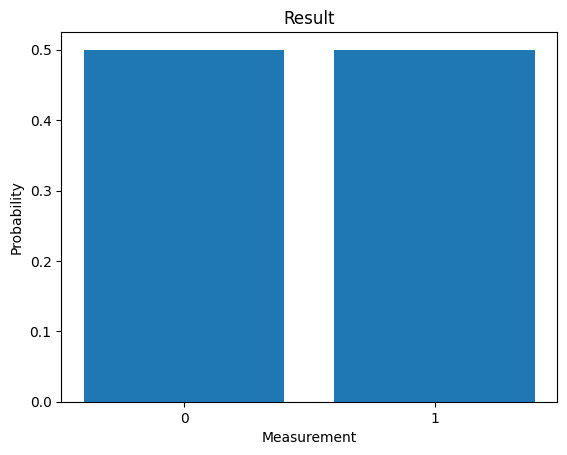

In [ ]:
result = qsharp.azure.execute(ExerciseOne, shots=100, jobName="Exercise #1", timeout=240)

pyplot.bar(result.keys(), result.values())
pyplot.title("Result")
pyplot.xlabel("Measurement")
pyplot.ylabel("Probability")

pyplot.show()

### **Exercise #2** 

**Together**, let's:
1. Prepare a qubit in the $| + \rangle $ state. This simulates Alice encoding a bit from her key that is 0 into a qubit and randomly selecting to put it into superposition.
2. Apply the H gate. This simulates Bob correctly guessing what Alice did for this qubit and taking it out of superposition.
3. Make a measurement. This simulates Bob measuring the qubit to decode this bit of the key.

#### **1. Declare the operation in python.**

Let's call it `ExerciseTwo`.

In [ ]:
ExerciseTwo : any = None

#### **2. Create the operation in Q#.**

In [ ]:
%%qsharp

operation ExerciseTwo() : Result {

    // Alice encodes a 0 into a qubit
    use q = Qubit();

    // Alice puts this qubit into superposition
    // COMPLETE THIS LINE

    // Bob receives the qubit and takes it out of superposition
    // COMPLETE THIS LINE

    // Bob measures the qubit
    return // COMPLETE THIS LINE
}

##### **Solution**

In [ ]:
%%qsharp

operation ExerciseTwo() : Result {

    // Alice encodes a 0 into a qubit
    use q = Qubit();

    // Alice puts this qubit into superposition
    H(q);

    // Bob receives the qubit and takes it out of superposition
    H(q);

    // Bob measures the qubit
    return M(q);
}

#### **3. Simulate the operation in python and visualize.**

**Run the code below to simulate this exercise and see the distribution of measurement results.**

Submitting ExerciseTwo to target ionq.simulator...
Job successfully submitted.
   Job name: Exercise #2
   Job ID: c9a2bad2-cd9c-4470-ba81-fa9f47acc5f6
Waiting up to 240 seconds for Azure Quantum job to complete...
[17:36:59] Current job status: Waiting
[17:37:04] Current job status: Succeeded


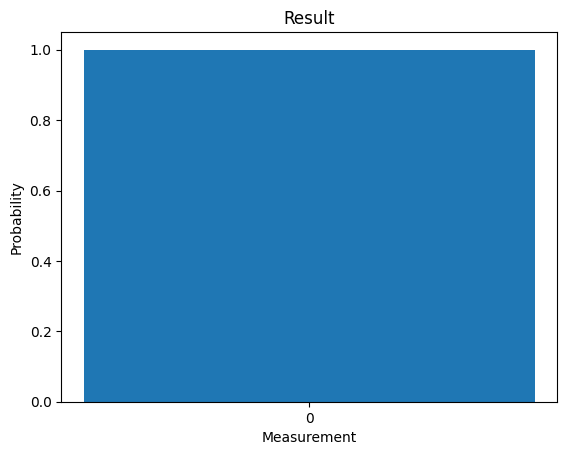

In [ ]:
result = qsharp.azure.execute(ExerciseTwo, shots=100, jobName="Exercise #2", timeout=240)

pyplot.bar(result.keys(), result.values())
pyplot.title("Result")
pyplot.xlabel("Measurement")
pyplot.ylabel("Probability")

pyplot.show()

### **Exercise #3**

**Independently**, 
1. Prepare a qubit in the $| 0 \rangle$ state. This simulates Alice encoding a bit from her key that is 0 into a qubit and randomly selecting *not* to put it into superposition.
2. Apply the H gate. This simulates Bob incorrectly guessing what Alice did for this qubit and accidentally putting it into superposition.
3. Make a measurement. This simulates Bob measuring the qubit to decode this bit of the key.

#### **1. Declare the operation in python.**

Let's call it `ExerciseThree`.

In [ ]:
ExerciseThree : any = None

#### **2. Create the operation in Q#.**

In [ ]:
%%qsharp

operation ExerciseThree() : Result {
   
    // Alice encodes a 0 into a qubit
    use q = Qubit();

    // Alice does not put this qubit into superposition
    // COMPLETE THIS LINE

    // Bob receives the qubit and incorrectly tries to take it out of superposition
    // COMPLETE THIS LINE

    // Bob measures the qubit
    return M(q);
    
}

##### **Solution**

In [ ]:
%%qsharp

operation ExerciseThree() : Result {
   
    // Alice encodes a 0 into a qubit
    use q = Qubit();

    // Alice does not put this qubit into superposition


    // Bob receives the qubit and incorrectly tries to take it out of superposition
    H(q);

    // Bob measures the qubit
    return M(q);
    
}

#### **3. Simulate the operation in python and visualize.**

**Run the code below to simulate this exercise and see the distribution of measurement results.**

Submitting ExerciseThree to target ionq.simulator...
Job successfully submitted.
   Job name: Exercise #3
   Job ID: a6bd24cd-44fc-4171-a8bf-fb9e5a5a7333
Waiting up to 240 seconds for Azure Quantum job to complete...
[17:37:16] Current job status: Waiting
[17:37:21] Current job status: Succeeded


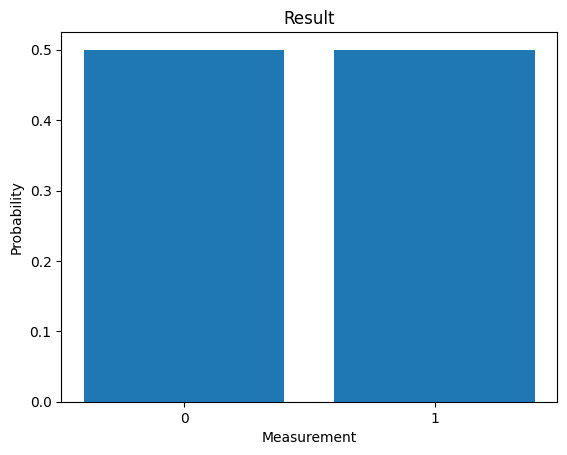

In [ ]:
result = qsharp.azure.execute(ExerciseThree, shots=100, jobName="Exercise #3", timeout=240)

pyplot.bar(result.keys(), result.values())
pyplot.title("Result")
pyplot.xlabel("Measurement")
pyplot.ylabel("Probability")

pyplot.show()

### **Exercise #4** 

**Independently**, 
1. Prepare a qubit in the $| - \rangle$ state. This simulates Alice encoding a bit from her key that is 1 into a qubit and randomly selecting to put it into superposition.
2. Apply the H gate. This simulates Bob correctly guessing what Alice did for this qubit and taking it out of superposition.
3. Make a measurement. This simulates Bob measuring the qubit to decode this bit of the key.

#### **1. Declare the operation in python.**

Let's call it `ExerciseFour`.

In [ ]:
ExerciseFour : any = None

#### **2. Create the operation in Q#.**

In [ ]:
%%qsharp

operation ExerciseFour() : Result {
   
    // Alice encodes a 1 into a qubit
    use q = Qubit();
    // COMPLETE THIS LINE

    // Alice does puts this qubit into superposition
    H(q);

    // Bob receives the qubit and correctly takes it out of superposition
    H(q);

    // Bob measures the qubit
    return M(q);
    
}

##### **Solution**

In [ ]:
%%qsharp

operation ExerciseFour() : Result {
   
    // Alice encodes a 1 into a qubit
    use q = Qubit();
    X(q);

    // Alice does puts this qubit into superposition
    H(q);

    // Bob receives the qubit and correctly takes it out of superposition
    H(q);

    // Bob measures the qubit
    return M(q);
    
}

#### **3. Simulate the operation in python and visualize.**

**Run the code below to simulate this exercise and see the distribution of measurement results.**

Submitting ExerciseFour to target ionq.simulator...
Job successfully submitted.
   Job name: Exercise #4
   Job ID: 5404f986-0b35-4261-97eb-214870ab7d39
Waiting up to 240 seconds for Azure Quantum job to complete...
[17:37:35] Current job status: Finishing
[17:37:40] Current job status: Succeeded


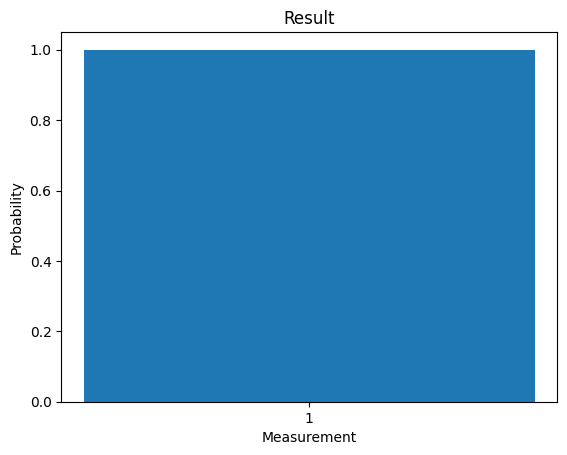

In [ ]:
result = qsharp.azure.execute(ExerciseFour, shots=100, jobName="Exercise #4", timeout=240)

pyplot.bar(result.keys(), result.values())
pyplot.title("Result")
pyplot.xlabel("Measurement")
pyplot.ylabel("Probability")

pyplot.show()

### **Exercise #5** 

**Together**, let's:
1. Prepare an array of 5 qubits all in the $| 1 \rangle$ state. This simulates Alice preparing and sending 5 qubits representing the key 11111 and randomly selecting to put no qubits into superposition.
2. Measure all the qubits. This simulates Bob correctly guessing that none of the qubits were put into superposition and decoding them.

#### **1. Declare the operation in python.**

Let's call it `ExerciseFive`.

In [ ]:
ExerciseFive : any = None

#### **2. Create the operation in Q#.**

In [ ]:
%%qsharp

operation ExerciseFive() : Result[] {
   
    // Alice encodes a 1 into 5 qubits
    use qs = // COMPLETE THIS LINE
    
    for i in 0 .. Length(qs) - 1 {
        // COMPLETE THIS LINE
    }

    // Bob receives the qubits and decodes them
    return MultiM(qs);
}

##### **Solution**

In [ ]:
%%qsharp

operation ExerciseFive() : Result[] {
   
    // Alice encodes a 1 into 5 qubits
    use qs = Qubit[5];

    for i in 0 .. Length(qs) - 1 {
        X(qs[i]);
    }


    // Bob receives the qubits and decodes them
    return MultiM(qs);
}

#### **3. Simulate the operation in python and visualize.**

**Run the code below to simulate this exercise and see the distribution of measurement results.**

Submitting ExerciseFive to target ionq.simulator...
Job successfully submitted.
   Job name: Exercise #5
   Job ID: f9d4410d-fd79-47cb-ad61-e1275bc08353
Waiting up to 240 seconds for Azure Quantum job to complete...
[17:39:17] Current job status: Waiting
[17:39:23] Current job status: Succeeded


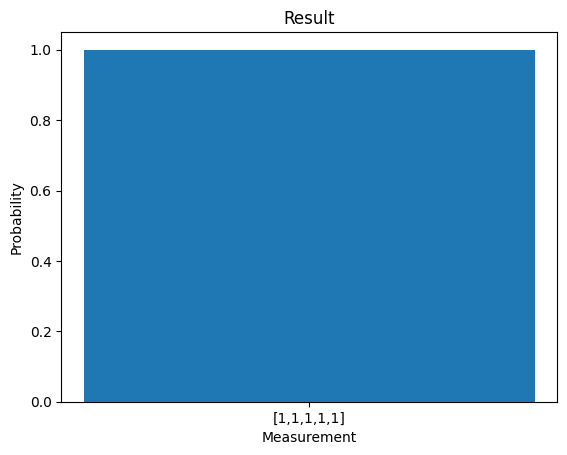

In [ ]:
result = qsharp.azure.execute(ExerciseFive, shots=100, jobName="Exercise #5", timeout=240)

pyplot.bar(result.keys(), result.values())
pyplot.title("Result")
pyplot.xlabel("Measurement")
pyplot.ylabel("Probability")

pyplot.show()

### **Exercise #6** 

**Together**, let's:
1. Prepare an array of `n` qubits all in the $| 0 \rangle$ state where `n` is a parameter passed into the operation. This simulates Alice encoding the key 00...0 in qubits.
2. For each qubit, if `aliceChoices` is `true` for that qubit then put it into superposition. Otherwise, leave it in the $| 0 \rangle$ state. This simulates Alice randomly selecting some qubits to put into superposition before sending to Bob.
3. Measure all the qubits. This simulates Bob guessing that none of the qubits were put into superposition and decoding them.

#### **1. Declare the operation in python.**

Let's call it `ExerciseSix`.

In [ ]:
ExerciseSix: any = None

#### **2. Create the operation in Q#.**

**NOTE**: We have provided you with the line `DrawMany(DrawRandomBool, n, 0.5)`, which creates an Array of `n` Bools that are randomly `True` 0.5 of the time and `False` the other 0.5 of the time.

In [ ]:
%%qsharp

operation ExerciseSix(n : Int) : Result[] {
   
    // Alice encodes a 0 into n qubits
    use qs = // COMPLETE THIS LINE

    // Alice randomly selects which qubits to put into superposition
    let aliceChoices = DrawMany(DrawRandomBool, n, 0.5);
    for i in 0 .. Length(aliceChoices) - 1{

        if aliceChoices[i] {
            // COMPLETE THIS LINE
        }
    }

    // Bob receives the qubits and decodes them
    return // COMPLETE THIS LINE
}

##### **Solution**

In [ ]:
%%qsharp

operation ExerciseSix(n : Int) : Result[] {
   
    // Alice encodes a 0 into n qubits
    use qs = Qubit[n];

    // Alice randomly selects which qubits to put into superposition
    let aliceChoices = DrawMany(DrawRandomBool, n, 0.5);
    for i in 0 .. Length(aliceChoices) - 1{

        if aliceChoices[i] {
            H(qs[i]);
        }
    }

    // Bob receives the qubits and decodes them
    return MultiM(qs);
}

#### **3. Simulate the operation in python and visualize.**

**Run the code below to simulate this exercise and see the distribution of measurement results.**

Submitting ExerciseSix to target ionq.simulator...
Job successfully submitted.
   Job name: Exercise #6
   Job ID: 57118b81-8bf0-4b6f-a29b-7d17c9c398c0
Waiting up to 240 seconds for Azure Quantum job to complete...
[13:32:45] Current job status: Waiting
[13:32:50] Current job status: Succeeded


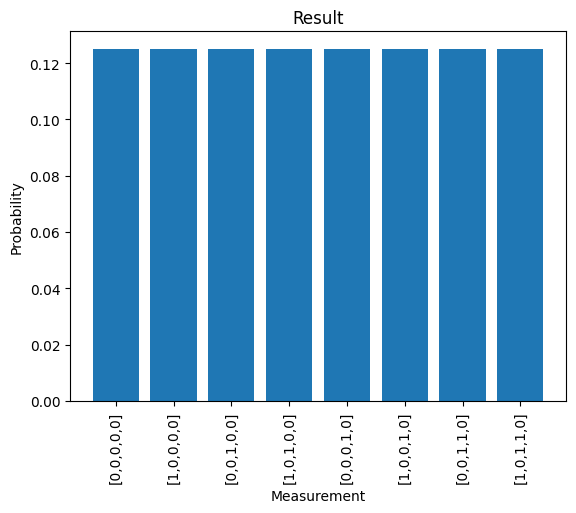

In [ ]:
result = qsharp.azure.execute(ExerciseSix, n = 5, shots=100, jobName="Exercise #6", timeout=240)

pyplot.bar(result.keys(), result.values())
pyplot.title("Result")
pyplot.xlabel("Measurement")
pyplot.ylabel("Probability")
pyplot.xticks(rotation = 90)

pyplot.show()

### **Exercise #7** 

**Run the code below to connect to hardware and run this operation on it.**

In [ ]:
qsharp.azure.target("ionq.qpu")
result = qsharp.azure.execute(ExerciseSix, n = 5, shots=100, jobName="Exercise #7", timeout=1000)

pyplot.bar(result.keys(), result.values())
pyplot.title("Result")
pyplot.xlabel("Measurement")
pyplot.ylabel("Probability")
pyplot.xticks(rotation = 90)

pyplot.show()

### **Summary**
We now know a few things: 

1. If Alice needs to encode a `0` into a qubit, she simply needs to use the command `use q = Qubit();` since qubits automatically start in the $| 0 \rangle $ state.

1. If Alice needs to encode a `1` into a qubit, she needs to apply an `X` gate to the qubit since:
$$ X|0\rangle = | 1 \rangle$$

1. If Alice randomly chooses to prepare a qubit in a superposition state, she can use the Hadamard gate since:
$$ H|0\rangle = | + \rangle $$
$$ H|1\rangle = | - \rangle $$

1. If Bob randomly chooses to try taking a qubit out of superposition, he can also use the Hadamard gate since:
$$ H|+\rangle = | 0 \rangle $$
$$ H|-\rangle = | 1 \rangle $$

1. Alice will encode her key by using a qubit for each bit of the key and applying an X gate if that bit is 1. She will then randomly choose some qubits to put into superposition and "send" them to Bob. Bob will then randomly choose some qubits to, hopefully, take out of superposition. He will then measure the qubits to decode them into bits that now represent his key.

<br><br>

**Technical Note:** When we apply an H gate right before measuring, we can actually say that we are "measuring in a different basis"- the Hadamard basis. It turns out that applying an H gate is the same as if we just rotated our view of the Bloch sphere so the x-axis were pointing up and down. For this reason, we also call this the X Basis. You are not responsible for knowing this, but it is worth being aware of since a lot of the discussion about QKD involves bases.

The most important thing for you to know is that when someone says that Alice or Bob measures a certain qubit:
* "in the Z basis", this is exactly the same as saying Alice or Bob chooses to not put this qubit in superposition.
* "in the X basis", this is exactly the same as saying Alice or Bob chooses to put this qubit in superposition.

## **Part #2: Quantum Key Distribution (BB84)**
---

Now let's implement QKD. Specifically, we will write code that simulates the BB84 protocol between Alice and Bob such that:

* The initial key Alice wants to share with Bob is 5 bits long and is represented by the array returned by the operation `AliceBits()`.

* We represent Alice's choices about whether to put each qubit into superposition or not using an array returned by the operation `AliceChoices()`, where `AliceChoices()[i] = false` if she chooses not to put qubit `i` into superposition and `AliceChoices()[i] = true` if she does choose to put qubit `i` into superposition.

* We represent Bob's choices and key in a similar way: `BobChoices()[i] = false` or `BobChoices()[i] = true` and `BobBits()`.

### **Phases #1 - 2: Alice Sends the Key and Bob Receives It.**

We will be defining multiple operations here, but still using our 3 step process.

#### **1. Declare the operations in python.**

In [ ]:
GetAliceBits : any = None
GetAliceChoices : any = None
GetBobChoices : any = None
SendAliceBob : any = None

#### **2. Create the operations in Q#.**


In [ ]:
%%qsharp

operation GetAliceBits(keyLength: Int) : Int[] {

    return DrawMany(DrawRandomInt, keyLength, (0, 1));
}


operation GetAliceChoices(keyLength: Int) : Bool[] {

    return DrawMany(DrawRandomBool, keyLength, 0.5);
}


operation GetBobChoices(keyLength: Int) : Bool[] {

    return DrawMany(DrawRandomBool, keyLength, 0.5);
}


operation SendAliceBob(aliceBits : Int[], aliceChoices : Bool[], bobChoices : Bool[]) : Result[] {
    
    //Qubits initialized
    let keyLength = // COMPLETE THIS LINE
    use qs =  // COMPLETE THIS LINE

    // Alice encodes her key
    //========================
    for i in 0 .. Length(aliceBits) - 1{

        // Encode a 1 into the |1> state
        // COMPLETE THIS CODE

        // Put Alice's random choice of qubits into superposition
        // COMPLETE THIS CODE
    }

    // Bob receives the key and
    // acts according to his choices of superpositions
    //=================================================
    for i in 0 .. Length(qs) - 1 {

        if bobChoices[i] {
            // COMPLETE THIS LINE
        }
    }

    // Bob measures the qubits
    // to decode the key
    //========================
    return // COMPLETE THIS LINE
}

##### **Solution**

In [ ]:
%%qsharp

operation GetAliceBits(keyLength: Int) : Int[] {

    return DrawMany(DrawRandomInt, keyLength, (0, 1));
}


operation GetAliceChoices(keyLength: Int) : Bool[] {

    return DrawMany(DrawRandomBool, keyLength, 0.5);
}


operation GetBobChoices(keyLength: Int) : Bool[] {

    return DrawMany(DrawRandomBool, keyLength, 0.5);
}


operation SendAliceBob(aliceBits : Int[], aliceChoices : Bool[], bobChoices : Bool[]) : Result[] {
    
    //Qubits initialized
    let keyLength = Length(aliceBits);
    use qs = Qubit[keyLength];

    // Alice encodes her key
    //========================
    for i in 0 .. Length(aliceBits) - 1{

        // Encode a 1 into the |1> state
        if aliceBits[i] == 1 {
            X(qs[i]);
        }

        // Put Alice's random choice of qubits into superposition
        if aliceChoices[i] {
            H(qs[i]);
        }
    }

    // Bob receives the key and
    // acts according to his choices of superpositions
    //=================================================
    for i in 0 .. Length(qs) - 1 {

        if bobChoices[i] {
            H(qs[i]);
        }
    }

    // Bob measures the qubits
    // to decode the key
    //========================
    return MultiM(qs);
}

#### **3. Simulate the operation in python and visualize.**

**Run the code below to simulate this exercise and see the distribution of measurement results.**

In [ ]:
keyLength = 5

# STEPS #1 - 2
aliceBits = GetAliceBits.simulate(keyLength = keyLength)
aliceChoices = GetAliceChoices(keyLength = keyLength)

print("Alice's bits: " + str(aliceBits))
print("Alice's choices: " + str(aliceChoices))
print("\n")


# STEPS #3 - 5
bobChoices = GetBobChoices.simulate(keyLength = keyLength)
bobBits = SendAliceBob.simulate(aliceBits = aliceBits, aliceChoices = aliceChoices, bobChoices = bobChoices)


print("Bob's choices: " + str(bobChoices))
print("Bob's bits: " + str(bobBits))
print("\n")

Alice's bits: [0, 1, 0, 1, 1]
Alice's choices: [False, True, False, True, True]


Bob's choices: [True, False, False, True, False]
Bob's bits: [1, 0, 0, 1, 1]




### **Phase #3: Alice "calls" Bob and they compare their choices for superposition bits to determine their new key.**

#### **Step #6: Alice and Bob compare notes and create their keys**

**Together**, let's write an operation that compares Alice's and Bob's choices for superposition bits and creates a key based on this.

##### **1. Declare the operation in python.**

Let's call it `GenerateKey`.

In [ ]:
GenerateKey : any = None

##### **2. Create the operation in Q#.**

In [ ]:
%%qsharp

operation GenerateKey(bits : Int[], aliceChoices : Bool[], bobChoices : Bool[]) : Int[] {

    // Count how many choices they agreed for
    mutable count = 0;
    for i in 0 .. Length(aliceChoices) - 1 {

        if aliceChoices[i] == bobChoices[i] {
            set count // COMPLETE THIS LINE
        }
    }

    // Create the key
    mutable key = [0, size =  // COMPLETE THIS LINE
    mutable keyID = 0;
    for i in 0 .. Length(aliceChoices) - 1 {

        if  // COMPLETE THIS LINE
            set key w/= keyID <- bits[i];
            set keyID += 1;
        }
    }
    
    return  // COMPLETE THIS LINE
}

###### **Solution**

In [ ]:
%%qsharp

operation GenerateKey(bits : Int[], aliceChoices : Bool[], bobChoices : Bool[]) : Int[] {

    // Count how many choices they agreed for
    mutable count = 0;
    for i in 0 .. Length(aliceChoices) - 1 {

        if aliceChoices[i] == bobChoices[i] {
            set count += 1;
        }
    }

    // Create the key
    mutable key = [0, size = count];
    mutable keyID = 0;
    for i in 0 .. Length(aliceChoices) - 1 {

        if aliceChoices[i] == bobChoices[i] {
            set key w/= keyID <- bits[i];
            set keyID += 1;
        }
    }
    
    return key;
}

#### **Step #7: Checking the shared key**

Now that Alice and Bob have discarded the bits where their choices were not the same, the remaining bits form a shared key. To verify that the Eve did not intercept and the protocol is secure, they share a chosen sample of their key and ensure that it matches. 

1. If they find that the shared sample from both Alice and Bob has matched, they discard these bits and use the rest of the shared key. 

2. If they find out that the shared sample does not match, they know that Eve has intercepted! They would need to start the process all over again.

<br>

**Together**, let's implement this as follows:
* Alice and Bob compare the first half of the key.
* If these bits are all the same, then return `true`.
* If any of these bits are different, then return `false`.

##### **1. Declare the operation in python.**

Let's call it `IsSecureKey`.

In [ ]:
IsSecureKey : any = None

##### **2. Create the operation in Q#.**

In [ ]:
%%qsharp

operation IsSecureKey(aliceKey : Int[], bobKey : Int[]) : Bool {

    for i in 0 .. Length(aliceKey) / 2 {

        // COMPLETE THIS CODE
    }

    return true;
}

###### **Solution**

In [ ]:
%%qsharp

operation IsSecureKey(aliceKey : Int[], bobKey : Int[]) : Bool {

    for i in 0 .. Length(aliceKey) / 2 {

        if aliceKey[i] != bobKey[i]{
            return false;
        }
    }

    return true;
}

### **Running the Full Protocol**

In the space below, we combine all these components to run the protocol in full for Alice and Bob.

In [ ]:
keyLength = 10

# STEPS #1 - 2
aliceBits = GetAliceBits.simulate(keyLength = keyLength)
aliceChoices = GetAliceChoices(keyLength = keyLength)

print("Alice's bits: " + str(aliceBits))
print("Alice's choices: " + str(aliceChoices))
print("\n")


# STEPS #3 - 5
bobChoices = GetBobChoices.simulate(keyLength = keyLength)
bobBits = SendAliceBob.simulate(aliceBits = aliceBits, aliceChoices = aliceChoices, bobChoices = bobChoices)

print("Bob's choices: " + str(bobChoices))
print("Bob's bits: " + str(bobBits))
print("\n")


# STEP #6
aliceKey = GenerateKey.simulate(bits = aliceBits, aliceChoices = aliceChoices, bobChoices = bobChoices)
bobKey = GenerateKey.simulate(bits = bobBits, aliceChoices = aliceChoices, bobChoices = bobChoices)

print("Alice's key: " + str(aliceKey))
print("Bob's key: " + str(bobKey))
print("\n")


# STEP #7
if IsSecureKey.simulate(aliceKey = aliceKey, bobKey = bobKey):

    aliceKey = aliceKey[len(aliceKey) // 2: ]
    bobKey = bobKey[len(bobKey) // 2: ]

    print("Key seems secure! They will now use: ")
    print("Alice's key: " + str(aliceKey))
    print("Bob's key: " + str(bobKey))

else:
    print("Alice and Bob have detected Eve's interception!")

Alice's bits: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Alice's choices: [True, False, False, True, False, True, False, False, False, True]


Bob's choices: [False, True, False, True, False, False, True, False, True, True]
Bob's bits: [1, 1, 1, 1, 1, 0, 0, 1, 0, 1]


Alice's key: [1, 1, 1, 1, 1]
Bob's key: [1, 1, 1, 1, 1]


Key seems secure! They will now use: 
Alice's key: [1, 1, 1]
Bob's key: [1, 1, 1]


---

<center>

### **Congratulations! You have just implemented the Full BB84 protocol between Alice and Bob in Q#.**

</center>

---

### **Running on Real Hardware**


Now, let's run this on real hardware. Specifically, we will:
1. Connect to IonQ's trapped ion computer: `"ionq.qpu"`.
1. Submit the `SendAliceBob` operation for execution.
1. Check the status of this job.
1. Use the results when the results are ready and complete the protocol.
1. Before continuing, reconnect to the simulator instead of hardware.

#### **1. Connect to IonQ's trapped ion computer: "ionq.qpu".**

In [ ]:
qsharp.azure.target("ionq.qpu")

#### **2. Submit the SendAliceBob operation for execution.**

In [ ]:
keyLength = 10

# STEPS #1 - 2
aliceBits = GetAliceBits.simulate(keyLength = keyLength)
aliceChoices = GetAliceChoices(keyLength = keyLength)

print("Alice's bits: " + str(aliceBits))
print("Alice's choices: " + str(aliceChoices))
print("\n")


# STEPS #3 - 5
bobChoices = GetBobChoices.simulate(keyLength = keyLength)
qsharp.azure.execute(SendAliceBob, aliceBits = aliceBits, aliceChoices = aliceChoices, bobChoices = bobChoices, shots = 10, jobName = "SendAliceBob", timeout = 1000)

Loading package Microsoft.Quantum.Providers.IonQ and dependencies...
Active target is now ionq.qpu
Alice's bits: [0, 1, 1, 1, 1, 0, 0, 0, 0, 0]
Alice's choices: [True, False, False, True, False, False, False, False, True, True]


Submitting SendAliceBobExecute to target ionq.qpu...
Job successfully submitted.
   Job name: SendAliceBob
   Job ID: 8173f999-1350-4b4f-b311-6924bf05c677
Waiting up to 1000 seconds for Azure Quantum job to complete...
[01:53:25] Current job status: Waiting
[01:53:30] Current job status: Waiting
[01:53:35] Current job status: Waiting


#### **3. Check the status of this job.**

In [ ]:
qsharp.azure.status('# To check on the status of your job, copy and paste the "Job ID" that was printed above.

#### **4. Use the results when the results are ready and complete the protocol.**

In [ ]:
bobBits = pickResult(qsharp.azure.output('# FILL THIS WITH THE JOB ID PRINTED ABOVE

print("Bob's choices: " + str(bobChoices))
print("Bob's bits: " + str(bobBits))
print("\n")


# STEP #6
aliceKey = GenerateKey.simulate(bits = aliceBits, aliceChoices = aliceChoices, bobChoices = bobChoices)
bobKey = GenerateKey.simulate(bits = bobBits, aliceChoices = aliceChoices, bobChoices = bobChoices)

print("Alice's key: " + str(aliceKey))
print("Bob's key: " + str(bobKey))
print("\n")


# STEP #7
if IsSecureKey.simulate(aliceKey = aliceKey, bobKey = bobKey):

    aliceKey = aliceKey[len(aliceKey) // 2: ]
    bobKey = bobKey[len(bobKey) // 2: ]

    print("Key seems secure! They will now use: ")
    print("Alice's key: " + str(aliceKey))
    print("Bob's key: " + str(bobKey))

else:
    print("Alice and Bob have detected Eve's interception!")

#### **5. Before continuing, reconnect to the simulator instead of hardware.**

In [ ]:
qsharp.azure.target("ionq.simulator")

## **Part #3: Eve Intercepts [Code Provided]**
---

Now, suppose Eve intercepts the (encoded) message that Alice has meant to send to Bob. Eve measures the qubits in the same way Bob would do in **Step #4** and **Step #5** and then sends them to Bob.

<br>

**Run the first two cells to define all necessary operations. Then run the last cell to simulate the full protocol.**

### **Define the Operations**

In [ ]:
SendAliceEve : any = None
SendEveBob : any = None

In [ ]:
operation SendAliceEve(aliceBits : Int[], aliceChoices : Bool[]) : Result[] {
    
    //Qubits initialized
    let keyLength = Length(aliceBits);
    use qs = Qubit[keyLength];

    // Alice encodes her key
    //========================
    for i in 0 .. Length(aliceBits) - 1{

        // Encode a 1 into the |1> state
        if aliceBits[i] == 1 {
            X(qs[i]);
        }

        // Put Alice's random choice of qubits into superposition
        if aliceChoices[i] {
            H(qs[i]);
        }
    }

    // Eve measures the qubits
    // to decode the key
    //========================
    return MultiM(qs);
}



operation SendEveBob(eveBits : Int[], bobChoices : Bool[]) : Result[] {
    
    //Qubits initialized
    let keyLength = Length(eveBits);
    use qs = Qubit[keyLength];

    // Eve encodes her measurements 
    // into qubits to send to Bob
    //==============================
    for i in 0 .. Length(eveBits) - 1{

        // Encode a 1 into the |1> state
        if eveBits[i] == 1 {
            X(qs[i]);
        }
    }


    // Bob receives the key unaware of Eve and
    // acts according to his choices of superpositions
    //=================================================
    for i in 0 .. Length(qs) - 1 {

        if bobChoices[i] {
            H(qs[i]);
        }
    }

    // Bob measures the qubits
    // to decode the key
    //========================
    return MultiM(qs);
}

### **Simulate BB84 with Interception**

In [ ]:
keyLength = 8

# STEPS #1 - 2
aliceBits = GetAliceBits.simulate(keyLength = keyLength)
aliceChoices = GetAliceChoices(keyLength = keyLength)

print("Alice's bits: " + str(aliceBits))
print("Alice's choices: " + str(aliceChoices))
print("\n")


# STEPS #3 - 5
# EVE INTERCEPTS

print("Eve Intercepts!")
eveBits = SendAliceEve.simulate(aliceBits = aliceBits, aliceChoices = aliceChoices)

print("Eve measures: " + str(eveBits))
print("\n")

# EVE SENDS QUBITS TO BOB
bobChoices = GetBobChoices.simulate(keyLength = keyLength)
bobBits = SendEveBob.simulate(eveBits = eveBits, bobChoices = bobChoices)

print("Bob's choices: " + str(bobChoices))
print("Bob's bits: " + str(bobBits))
print("\n")


# STEP #6
aliceKey = GenerateKey.simulate(bits = aliceBits, aliceChoices = aliceChoices, bobChoices = bobChoices)
bobKey = GenerateKey.simulate(bits = bobBits, aliceChoices = aliceChoices, bobChoices = bobChoices)

print("Alice's key: " + str(aliceKey))
print("Bob's key: " + str(bobKey))
print("\n")


# STEP #7
if IsSecureKey.simulate(aliceKey = aliceKey, bobKey = bobKey):

    aliceKey = aliceKey[len(aliceKey) // 2: ]
    bobKey = bobKey[len(bobKey) // 2: ]

    print("Key seems secure! They will now use: ")
    print("Alice's key: " + str(aliceKey))
    print("Bob's key: " + str(bobKey))

else:
    print("Alice and Bob have detected Eve's interception!")

Alice's bits: [1, 0, 0, 1, 0, 1, 1, 0]
Alice's choices: [False, True, False, True, True, False, False, True]


Eve Intercepts!
Eve measures: [1, 0, 0, 0, 0, 1, 1, 1]


Bob's choices: [False, True, True, False, False, False, False, True]
Bob's bits: [1, 0, 1, 0, 0, 1, 1, 1]


Alice's key: [1, 0, 1, 1, 0]
Bob's key: [1, 0, 1, 1, 1]


Key seems secure! They will now use: 
Alice's key: [1, 1, 0]
Bob's key: [1, 1, 1]


## **Part #4: The Full Protocol [Code Provided]**
---

In the cells below, we provide the full protocol, including Eve, so that you can see it altogether. This is broken into 4 pieces,

1. **Define the Operations**: You must run this code to ensure all necessary operations are defined.

2. **Simulate BB84**: This contains all the code in one cell to simulate BB84 from start to finish, with options to change the key length and if Eve intercepts or not.

3. **Execute BB84 with No Interception on a Target**: This contains all the code to execute BB84 from start to finish *with no Eve*. It is broken into 2 cells with the first one ending with submiting a job for execution that can then be picked back up on when the job is complete.

4. **Execute BB84 with Interception on a Target**: This contains all the code to execute BB84 from start to finish *with Eve*. It is broken into 3 cells with the first two cells ending with job submissions that can then be picked back up on when the jobs are complete.

### **1. Define the Operations**

**You must run this to use the code below.**

In [ ]:
GetAliceBits: any = None
GetAliceChoices: any = None
GetBobChoices: any = None

SendAliceBob: any = None
SendAliceEve: any = None
SendEveBob: any = None

GenerateKey: any = None
IsSecureKey: any = None

In [ ]:
%%qsharp

// Alice and Bob getting setup
//=============================
operation GetAliceBits(keyLength: Int) : Int[] {

    return DrawMany(DrawRandomInt, keyLength, (0, 1));
}



operation GetAliceChoices(keyLength: Int) : Bool[] {

    return DrawMany(DrawRandomBool, keyLength, 0.5);
}


operation GetBobChoices(keyLength: Int) : Bool[] {

    return DrawMany(DrawRandomBool, keyLength, 0.5);
}



// Alice, Bob, and potentially Eve communicating through the quantum channel
//===========================================================================

operation SendAliceBob(aliceBits : Int[], aliceChoices : Bool[], bobChoices : Bool[]) : Result[] {
    
    //Qubits initialized
    let keyLength = Length(aliceBits);
    use qs = Qubit[keyLength];

    // Alice encodes her key
    //========================
    for i in 0 .. Length(aliceBits) - 1{

        // Encode a 1 into the |1> state
        if aliceBits[i] == 1 {
            X(qs[i]);
        }

        // Put Alice's random choice of qubits into superposition
        if aliceChoices[i] {
            H(qs[i]);
        }
    }

    // Bob receives the key and
    // acts according to his choices of superpositions
    //=================================================
    for i in 0 .. Length(qs) - 1 {

        if bobChoices[i] {
            H(qs[i]);
        }
    }

    // Bob measures the qubits
    // to decode the key
    //========================
    return MultiM(qs);
}


operation SendAliceEve(aliceBits : Int[], aliceChoices : Bool[]) : Result[] {
    
    //Qubits initialized
    let keyLength = Length(aliceBits);
    use qs = Qubit[keyLength];

    // Alice encodes her key
    //========================
    for i in 0 .. Length(aliceBits) - 1{

        // Encode a 1 into the |1> state
        if aliceBits[i] == 1 {
            X(qs[i]);
        }

        // Put Alice's random choice of qubits into superposition
        if aliceChoices[i] {
            H(qs[i]);
        }
    }

    // Eve measures the qubits
    // to decode the key
    //========================
    return MultiM(qs);
}



operation SendEveBob(eveBits : Int[], bobChoices : Bool[]) : Result[] {
    
    //Qubits initialized
    let keyLength = Length(eveBits);
    use qs = Qubit[keyLength];

    // Eve encodes her measurements 
    // into qubits to send to Bob
    //==============================
    for i in 0 .. Length(eveBits) - 1{

        // Encode a 1 into the |1> state
        if eveBits[i] == 1 {
            X(qs[i]);
        }
    }


    // Bob receives the key unaware of Eve and
    // acts according to his choices of superpositions
    //=================================================
    for i in 0 .. Length(qs) - 1 {

        if bobChoices[i] {
            H(qs[i]);
        }
    }

    // Bob measures the qubits
    // to decode the key
    //========================
    return MultiM(qs);
}



// Alice and Bob comparing and generating keys
//=============================================
operation GenerateKey(bits : Int[], aliceChoices : Bool[], bobChoices : Bool[]) : Int[] {

    // Count how many choices they agreed on
    //=======================================
    mutable count = 0;
    for i in 0 .. Length(aliceChoices) - 1 {

        if aliceChoices[i] == bobChoices[i] {
            set count += 1;
        }
    }

    // Create the key
    //================
    mutable key = [0, size = count];
    mutable keyID = 0;
    for i in 0 .. Length(aliceChoices) - 1 {

        if aliceChoices[i] == bobChoices[i] {
            set key w/= keyID <- bits[i];
            set keyID += 1;
        }
    }
    
    return key;
}

operation IsSecureKey(aliceKey : Int[], bobKey : Int[]) : Bool {

    // Check the first half of the keys
    // to make sure they agree
    //==================================
    for i in 0 .. Length(aliceKey) / 2 {

        if aliceKey[i] != bobKey[i]{
            return false;
        }
    }

    return true;
}

### **2. Simulate BB84**

In [ ]:
keyLength = 5
eveIntercepts = False


# STEPS #1 - 2
aliceBits = GetAliceBits.simulate(keyLength = keyLength)
aliceChoices = GetAliceChoices(keyLength = keyLength)
bobChoices = GetBobChoices.simulate(keyLength = keyLength)

print("Alice's bits: " + str(aliceBits))
print("Alice's choices: " + str(aliceChoices))
print("\n")


# STEPS #3 - 5
if eveIntercepts:
    # EVE INTERCEPTS
    print("Eve Intercepts!")
    eveBits = SendAliceEve.simulate(aliceBits = aliceBits, aliceChoices = aliceChoices)

    print("Eve measures: " + str(eveBits))
    print("\n")

    # EVE SENDS QUBITS TO BOB
    bobBits = SendEveBob.simulate(eveBits = eveBits, bobChoices = bobChoices)

else:
    bobBits = SendAliceBob.simulate(aliceBits = aliceBits, aliceChoices = aliceChoices, bobChoices = bobChoices)

print("Bob's choices: " + str(bobChoices))
print("Bob's bits: " + str(bobBits))
print("\n")


# STEP #6
aliceKey = GenerateKey.simulate(bits = aliceBits, aliceChoices = aliceChoices, bobChoices = bobChoices)
bobKey = GenerateKey.simulate(bits = bobBits, aliceChoices = aliceChoices, bobChoices = bobChoices)

print("Alice's key: " + str(aliceKey))
print("Bob's key: " + str(bobKey))
print("\n")


# STEP #7
if IsSecureKey.simulate(aliceKey = aliceKey, bobKey = bobKey):

    aliceKey = aliceKey[len(aliceKey) // 2: ]
    bobKey = bobKey[len(bobKey) // 2: ]

    print("Key seems secure! They will now use: ")
    print("Alice's key: " + str(aliceKey))
    print("Bob's key: " + str(bobKey))

else:
    print("Alice and Bob have detected Eve's interception!")

### **3. Execute BB84 with No Interception on a Target**

In [ ]:
keyLength = 5

# STEPS #1 - 2
aliceBits = GetAliceBits.simulate(keyLength = keyLength)
aliceChoices = GetAliceChoices(keyLength = keyLength)
bobChoices = GetBobChoices.simulate(keyLength = keyLength)

print("Alice's bits: " + str(aliceBits))
print("Alice's choices: " + str(aliceChoices))
print("\n")

qsharp.azure.execute(SendEveBob, eveBits = eveBits, bobChoices = bobChoices, shots = 10, timeout = 1000)

In [ ]:
bobBits = pickResult(qsharp.azure.output(' # COMPLETE THIS LINE WITH THE JOB ID PRINTED ABOVE

print("Bob's choices: " + str(bobChoices))
print("Bob's bits: " + str(bobBits))
print("\n")


# STEP #6
aliceKey = GenerateKey.simulate(bits = aliceBits, aliceChoices = aliceChoices, bobChoices = bobChoices)
bobKey = GenerateKey.simulate(bits = bobBits, aliceChoices = aliceChoices, bobChoices = bobChoices)

print("Alice's key: " + str(aliceKey))
print("Bob's key: " + str(bobKey))
print("\n")


# STEP #7
if IsSecureKey.simulate(aliceKey = aliceKey, bobKey = bobKey):

    aliceKey = aliceKey[len(aliceKey) // 2: ]
    bobKey = bobKey[len(bobKey) // 2: ]

    print("Key seems secure! They will now use: ")
    print("Alice's key: " + str(aliceKey))
    print("Bob's key: " + str(bobKey))

else:
    print("Alice and Bob have detected Eve's interception!")

### **4. Execute BB84 with Interception on a Target**

In [ ]:
keyLength = 5

# STEPS #1 - 2
aliceBits = GetAliceBits.simulate(keyLength = keyLength)
aliceChoices = GetAliceChoices(keyLength = keyLength)
bobChoices = GetBobChoices.simulate(keyLength = keyLength)

print("Alice's bits: " + str(aliceBits))
print("Alice's choices: " + str(aliceChoices))
print("\n")

# EVE INTERCEPTS
print("Eve Intercepts!")
qsharp.azure.execute(SendAliceEve, aliceBits = aliceBits, aliceChoices = aliceChoices, shots = 10, timeout = 1000)

In [ ]:
eveBits = pickResult(qsharp.azure.output(' # COMPLETE THIS LINE WITH THE JOB ID PRINTED ABOVE

print("Eve measures: " + str(eveBits))
print("\n")

# EVE SENDS QUBITS TO BOB
qsharp.azure.execute(SendEveBob, eveBits = eveBits, bobChoices = bobChoices, shots = 10, timeout = 1000)

In [ ]:
bobBits = pickResult(qsharp.azure.output(' # COMPLETE THIS LINE WITH THE JOB ID PRINTED ABOVE

print("Bob's choices: " + str(bobChoices))
print("Bob's bits: " + str(bobBits))
print("\n")


# STEP #6
aliceKey = GenerateKey.simulate(bits = aliceBits, aliceChoices = aliceChoices, bobChoices = bobChoices)
bobKey = GenerateKey.simulate(bits = bobBits, aliceChoices = aliceChoices, bobChoices = bobChoices)

print("Alice's key: " + str(aliceKey))
print("Bob's key: " + str(bobKey))
print("\n")


# STEP #7
if IsSecureKey.simulate(aliceKey = aliceKey, bobKey = bobKey):

    aliceKey = aliceKey[len(aliceKey) // 2: ]
    bobKey = bobKey[len(bobKey) // 2: ]

    print("Key seems secure! They will now use: ")
    print("Alice's key: " + str(aliceKey))
    print("Bob's key: " + str(bobKey))

else:
    print("Alice and Bob have detected Eve's interception!")

# End of Notebook
---
© 2023 The Coding School, All rights reserved